In [ ]:
# !pip install tensorflow_hub
# !pip install tensorflow_text

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd

In [3]:
df = pd.read_csv(r"D:\MY WORK D Drive\CODING\Python\Machine Learning in Python\ML_Algo_Datasets\spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [5]:
# there is imblance in dataset
# handling imblance
df["Category"].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [6]:
# to keep things easy we will randomly select 747 ham emails and discard rest (not the best approch)
df_spam = df[df["Category"]=="spam"]
df_spam.shape

(747, 2)

In [7]:
df_ham = df[df["Category"]=="ham"]
df_ham.shape

(4825, 2)

In [8]:
# df.sample(n) where n is no. af samples to be picked randomly 
df_ham_downsamled = df_ham.sample(df_spam.shape[0])
df_ham_downsamled .shape

(747, 2)

In [9]:
df_balanced = pd.concat([df_spam, df_ham_downsamled])
df_balanced.shape

(1494, 2)

In [10]:
df_balanced["Category"].value_counts()

Category
spam    747
ham     747
Name: count, dtype: int64

In [11]:
df_balanced.sample(5)

,Category,Message
2386,spam,Someone has contacted our dating service and e...
2617,ham,I went to ur hon lab but no one is there.
2699,spam,FROM 88066 LOST £12 HELP
181,ham,You lifted my hopes with the offer of money. I...
301,ham,"Awesome, I remember the last time we got someb..."


In [12]:
df_balanced["spam"] = df_balanced["Category"].apply(lambda x: 1 if x=="spam" else 0)
df_balanced.sample(5)

,Category,Message,spam
2377,ham,I'm on my way home. Went to change batt 4 my w...,0
2747,ham,K da:)how many page you want?,0
2915,spam,Sorry! U can not unsubscribe yet. THE MOB offe...,1
1500,spam,"SMS. ac JSco: Energy is high, but u may not kn...",1
2275,ham,Think I could stop by in like an hour or so? M...,0


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced["Message"], df_balanced["spam"], stratify=df_balanced["spam"])

In [22]:
preprocess_url = "https://kaggle.com/models/tensorflow/bert/TensorFlow2/en-uncased-preprocess/3"
encoder_url = "https://kaggle.com/models/tensorflow/bert/TensorFlow2/en-uncased-l-12-h-768-a-12/3"

bert_preporcessor = hub.KerasLayer(preprocess_url)
bert_encoder = hub.KerasLayer(encoder_url) # pretrained bert model encoder

In [23]:
def get_sentence_embedding(sentences):
    text_preprocessed = bert_preporcessor(sentences)
    bert_result = bert_encoder(text_preprocessed)
    return bert_result["pooled_output"]

get_sentence_embedding([
    "500$ discount, hurry up",
    "Bhavin, are you uo for a volleyball game tomorrow"
])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.7734201 , -0.5013771 , -0.80737454, ..., -0.60576564,
        -0.7409628 ,  0.8849831 ],
       [-0.82718235, -0.553581  , -0.9629    , ..., -0.8858417 ,
        -0.72482896,  0.85280246]], dtype=float32)>

In [24]:
# let's explore exactly what are these embeddings
e = get_sentence_embedding([
    "banana",
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
])

e

<tf.Tensor: shape=(6, 768), dtype=float32, numpy=
array([[-0.7606918 , -0.1421939 ,  0.49604574, ...,  0.42165285,
        -0.5322141 ,  0.80312175],
       [-0.86023235, -0.21242955,  0.49156868, ...,  0.39797997,
        -0.60506296,  0.8447167 ],
       [-0.7128861 , -0.154639  ,  0.38401723, ...,  0.3527877 ,
        -0.5099134 ,  0.734741  ],
       [-0.82533467, -0.3555055 , -0.5906963 , ..., -0.01613665,
        -0.61417556,  0.8723029 ],
       [-0.75041366, -0.26812616, -0.26689747, ...,  0.02839359,
        -0.59380996,  0.797499  ],
       [-0.78544384, -0.29949707,  0.41027373, ...,  0.52225375,
        -0.49573553,  0.81507534]], dtype=float32)>

In [25]:
# we can use cosine similarity to check if two vectors are close
# if vectors are pointing the same direction then cosine similarity is close to 1 
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([e[0]], [e[1]]) # banana and grapes

array([[0.9911088]], dtype=float32)

In [26]:
cosine_similarity([e[0]], [e[3]]) # banana and jeff bezos

array([[0.84703875]], dtype=float32)

In [27]:
cosine_similarity([e[3]], [e[4]]) # jeff bezos and elon musk

array([[0.9872036]], dtype=float32)

### Create The Model
- There are two ways to create model in tensorflow(Sequential and Functional)
- Read more - https://medium.com/analytics-vidhya/keras-model-sequential-api-vs-functional-api-fc1439a6fb10
- Up untill now we have created sequential models which includes sequence of layers
- This time we will create **Functional model**

**How to Create Functional Model**
- You create the input layer -> input1 = Input(shape)
- Then you create next layer and passs the previous layer(input layer) as if you are calling a function -> hidden1 = Dense(nodes, activation)(input1)
- Continue same for next layer -> output = Dense(nodes, activation)(hidden1)
- at last we create a model with input and output -> model_function = Model(input, output)
- You can have multiple inputs and outputs and can build complex models

**Our Model Structure**

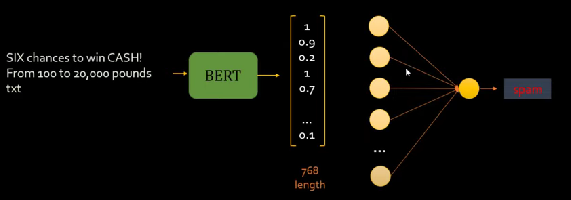


In [29]:
# BERT layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name="mail_text")
preprocessed_text = bert_preporcessor(text_input)
bert_embeddings = bert_encoder(preprocessed_text)

# Neural Network Layers
l1 = tf.keras.layers.Dropout(0.1, name="dropout")(bert_embeddings["pooled_output"])
l2 = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(l1)

# Construct Final Model
model = tf.keras.Model(inputs=[text_input], outputs=[l2])

In [30]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 mail_text (InputLayer)         [(None,)]            0           []                               
                                                                                                  
 keras_layer_4 (KerasLayer)     {'input_mask': (Non  0           ['mail_text[0][0]']              
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [34]:
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name="accuracy"),
    tf.keras.metrics.Precision(name="precision"),
    tf.keras.metrics.Recall(name="recall")
]

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=METRICS)

In [36]:
model.fit(X_train, y_train, epochs=5) # it will take some time to train

Epoch 1/5
35/35 [==============================] - 462s 13s/step - loss: 0.4992 - accuracy: 0.8196 - precision: 0.8065 - recall: 0.8411
Epoch 2/5
35/35 [==============================] - 498s 14s/step - loss: 0.4231 - accuracy: 0.8786 - precision: 0.8869 - recall: 0.8679
Epoch 3/5
35/35 [==============================] - 538s 15s/step - loss: 0.3883 - accuracy: 0.8723 - precision: 0.8481 - recall: 0.9071
Epoch 4/5
35/35 [==============================] - 543s 15s/step - loss: 0.3533 - accuracy: 0.8946 - precision: 0.8759 - recall: 0.9196
Epoch 5/5
35/35 [==============================] - 570s 16s/step - loss: 0.3330 - accuracy: 0.8920 - precision: 0.8817 - recall: 0.9054


In [37]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 149s 12s/step - loss: 0.3571 - accuracy: 0.8930 - precision: 0.8808 - recall: 0.9091


[0.3570779263973236, 0.893048107624054, 0.8808290362358093, 0.9090909361839294]

In [38]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

12/12 [==============================] - 150s 12s/step


In [39]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0) # if value is greater than 0.5 then put 1 else put 0
y_predicted

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)

Text(50.722222222222214, 0.5, 'Truth')

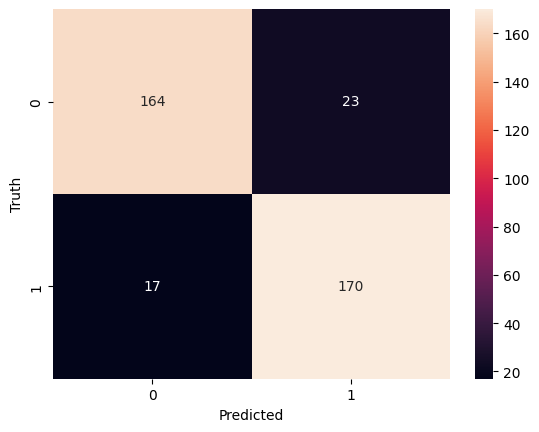

In [44]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt="d", )
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [45]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       187
           1       0.88      0.91      0.89       187

    accuracy                           0.89       374
   macro avg       0.89      0.89      0.89       374
weighted avg       0.89      0.89      0.89       374



In [46]:
reviews = [
    'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]
model.predict(reviews)

1/1 [==============================] - 3s 3s/step


array([[0.71167135],
       [0.7827385 ],
       [0.747818  ],
       [0.25795746],
       [0.15065941]], dtype=float32)